In [1]:
!pip install matplotlib seaborn pandas python-dotenv

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/d2l-1.0.0b0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/gpytorch-1.11-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specif

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dotenv
import os
import json
from message import Message
from data_load import load_messages_from_directory
import numpy as np


# Ensure that visuals appear inline in the notebook
%matplotlib inline


In [2]:
dotenv.load_dotenv()

messages_folder = os.getenv("MESSAGES_FOLDER_PATH")

messages, text_messages = load_messages_from_directory(messages_folder)
print(len(messages), len(text_messages))
print(messages[0])

Loading message_2.json
Loading message_3.json
Loading message_4.json
Loading message_5.json
Loading message_6.json
Loading message_1.json
57856 56088
Sender: TL
Timestamp: April 26, 2013 10:24.35 PM UTC-05:00
Message: We need a group to organise these pranks better. this one is of just us guys


In [3]:
data = []

for message in messages:
    data.append({"sender": message.sender, "content": message.content, "timestamp": message.timestamp, "type": message.message_type})

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['message_length'] = df['content'].fillna("").apply(len)
df['log_message_length'] = df['message_length'].replace(0,1).apply(lambda x: np.log2(x))

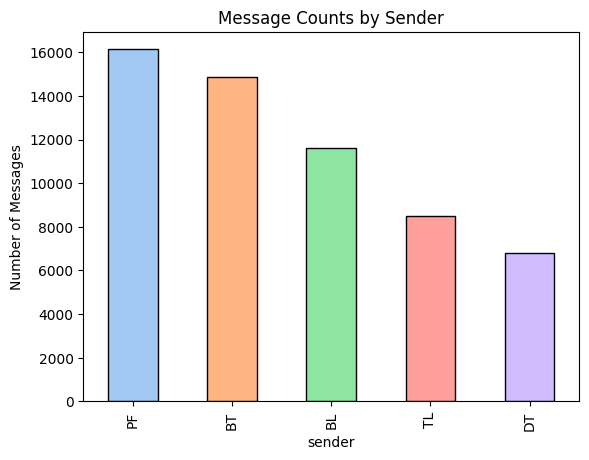

Entropy of the message distribution across senders: 2.25
Max entropy with 5 senders: 2.32


In [47]:
message_counts = df['sender'].value_counts()
message_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Message Counts by Sender")
plt.ylabel("Number of Messages")
plt.show()

probabilities = message_counts / message_counts.sum()

# Calculate the entropy
entropy = -np.sum(probabilities * np.log2(probabilities))
max_entropy = np.log2(5)

print(f"Entropy of the message distribution across senders: {entropy:.2f}")
print(f"Max entropy with 5 senders: {max_entropy:.2f}")

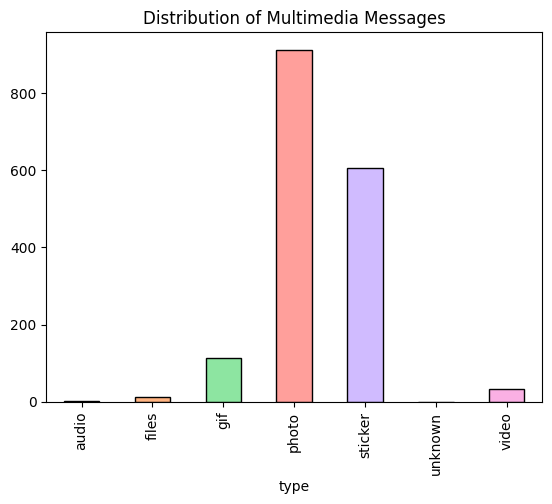

In [23]:
type_counts = df.groupby('type')['content'].count()

# Identify the dominant category
dominant_category = type_counts.idxmax()

# Remove the dominant category from the counts
filtered_type_counts = type_counts[type_counts.index != dominant_category]

filtered_type_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Distribution of Multimedia Messages")
plt.ylabel("")
plt.show()

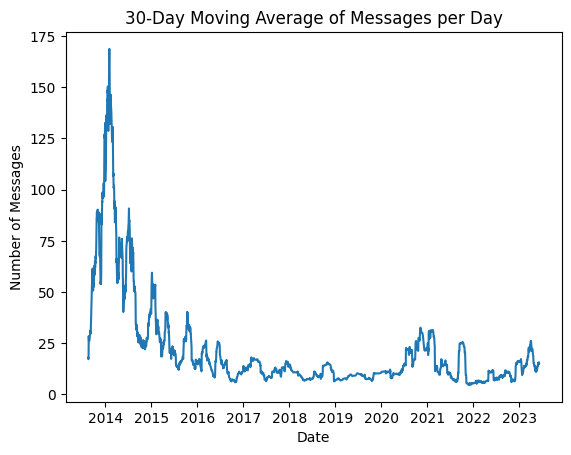

In [6]:
# Extract the date from the timestamp
df['date'] = df['timestamp'].dt.date

# Group by date and count messages
messages_over_time = df.groupby('date').size()

# Compute the 30-day moving average
moving_avg = messages_over_time.rolling(window=30).mean()

# Plot the moving average
moving_avg.plot()
plt.title("30-Day Moving Average of Messages per Day")
plt.ylabel("Number of Messages")
plt.xlabel("Date")
plt.show()


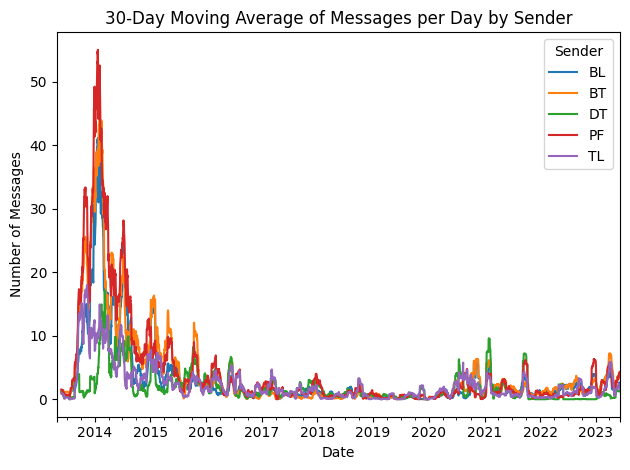

In [43]:
# Group by date and sender, then count messages
messages_over_time = df.groupby(['date', 'sender']).size().unstack()

# Ensure dataframe has a continuous date range
all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max())
messages_over_time = messages_over_time.reindex(all_dates).fillna(0)

# Compute the 30-day moving average for each sender
moving_avg = messages_over_time.rolling(window=30).mean()

# Plot the moving average for each sender
moving_avg.plot()

plt.title("30-Day Moving Average of Messages per Day by Sender")
plt.ylabel("Number of Messages")
plt.xlabel("Date")
plt.legend(title="Sender")
plt.tight_layout()
plt.show()

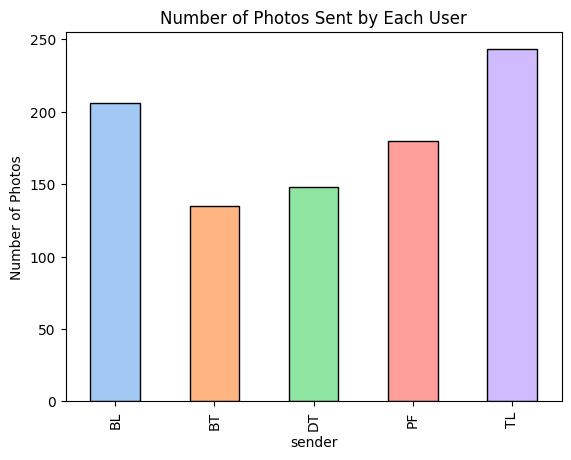

In [7]:
photo_df = df[df['type'] == 'photo']
photo_counts = photo_df.groupby('sender')['content'].count()
photo_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("Number of Photos Sent by Each User")
plt.ylabel("Number of Photos")
plt.show()

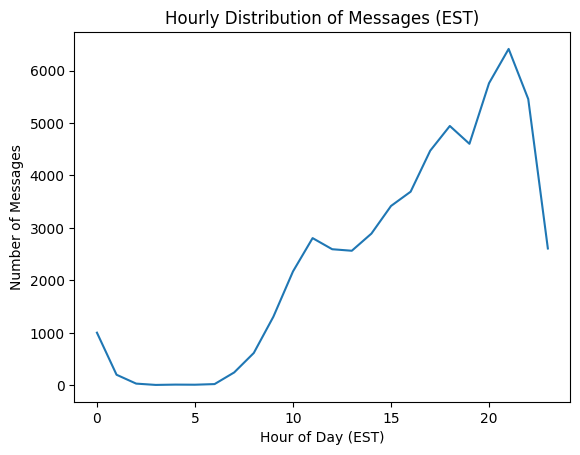

In [8]:
# Convert to EST timezone
df['timestamp_est'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

# Extract hour in EST
df['hour_est'] = df['timestamp_est'].dt.hour

hourly_distribution = df.groupby('hour_est').size()
hourly_distribution.plot()
plt.title("Hourly Distribution of Messages (EST)")
plt.ylabel("Number of Messages")
plt.xlabel("Hour of Day (EST)")
plt.show()

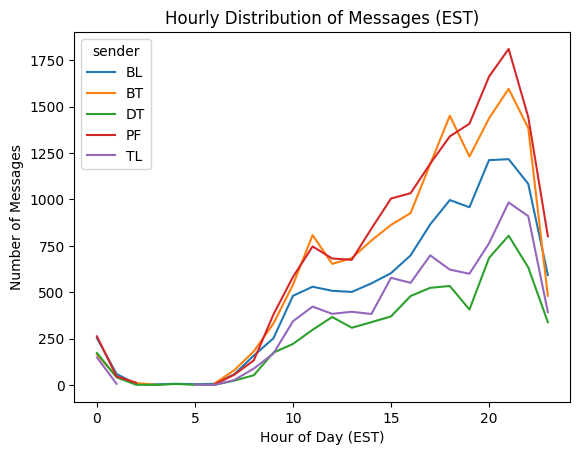

sender        BL      BT     DT      PF     TL
hour_est                                      
0          253.0   165.0  173.0   263.0  149.0
1           60.0    45.0   42.0    47.0    7.0
2            6.0    11.0    2.0    13.0    NaN
3            4.0     2.0    1.0     NaN    NaN
4            7.0     NaN    6.0     NaN    NaN
5            5.0     NaN    2.0     NaN    4.0
6            7.0     9.0    2.0     4.0    1.0
7           58.0    80.0   24.0    56.0   27.0
8          159.0   182.0   53.0   133.0   89.0
9          252.0   331.0  175.0   380.0  170.0
10         481.0   541.0  222.0   583.0  344.0
11         530.0   808.0  298.0   747.0  423.0
12         508.0   653.0  367.0   682.0  384.0
13         502.0   684.0  309.0   675.0  395.0
14         548.0   779.0  339.0   843.0  383.0
15         603.0   863.0  370.0  1005.0  578.0
16         699.0   927.0  480.0  1034.0  551.0
17         866.0  1191.0  524.0  1193.0  699.0
18         997.0  1451.0  534.0  1340.0  622.0
19         95

In [44]:
hourly_distribution = df.groupby(['hour_est', 'sender']).size().unstack()
hourly_distribution.plot()
plt.title("Hourly Distribution of Messages (EST)")
plt.ylabel("Number of Messages")
plt.xlabel("Hour of Day (EST)")
plt.show()
print(hourly_distribution)

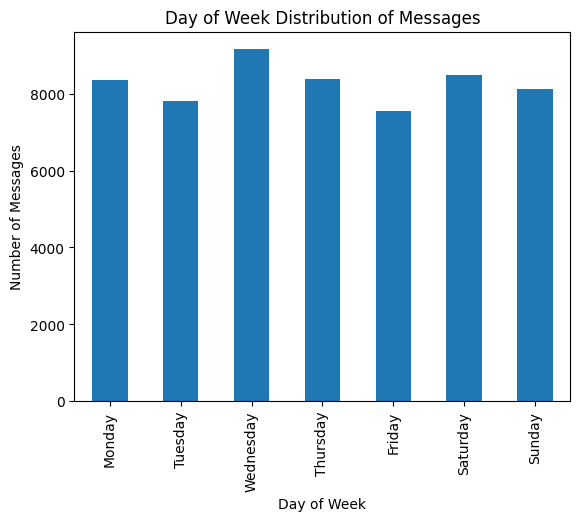

In [9]:
# Extract day of week
df['day_of_week'] = df['timestamp_est'].dt.day_name()

day_of_week_distribution = df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_distribution.plot(kind='bar')
plt.title("Day of Week Distribution of Messages")
plt.ylabel("Number of Messages")
plt.xlabel("Day of Week")
plt.show()


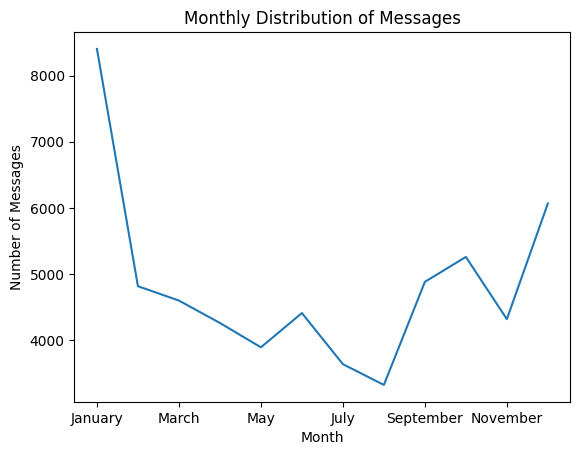

In [10]:
# Extract month
df['month'] = df['timestamp_est'].dt.month_name()

month_distribution = df.groupby('month').size().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
month_distribution.plot()
plt.title("Monthly Distribution of Messages")
plt.ylabel("Number of Messages")
plt.xlabel("Month")
plt.show()


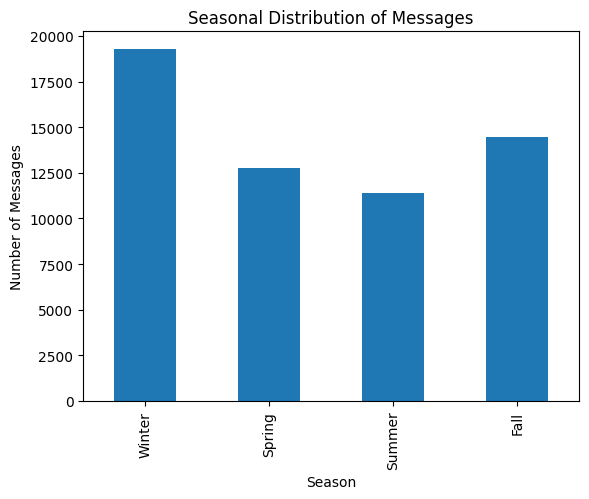

In [11]:
def season_from_month(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(season_from_month)

season_distribution = df.groupby('season').size().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
season_distribution.plot(kind='bar')
plt.title("Seasonal Distribution of Messages")
plt.ylabel("Number of Messages")
plt.xlabel("Season")
plt.show()


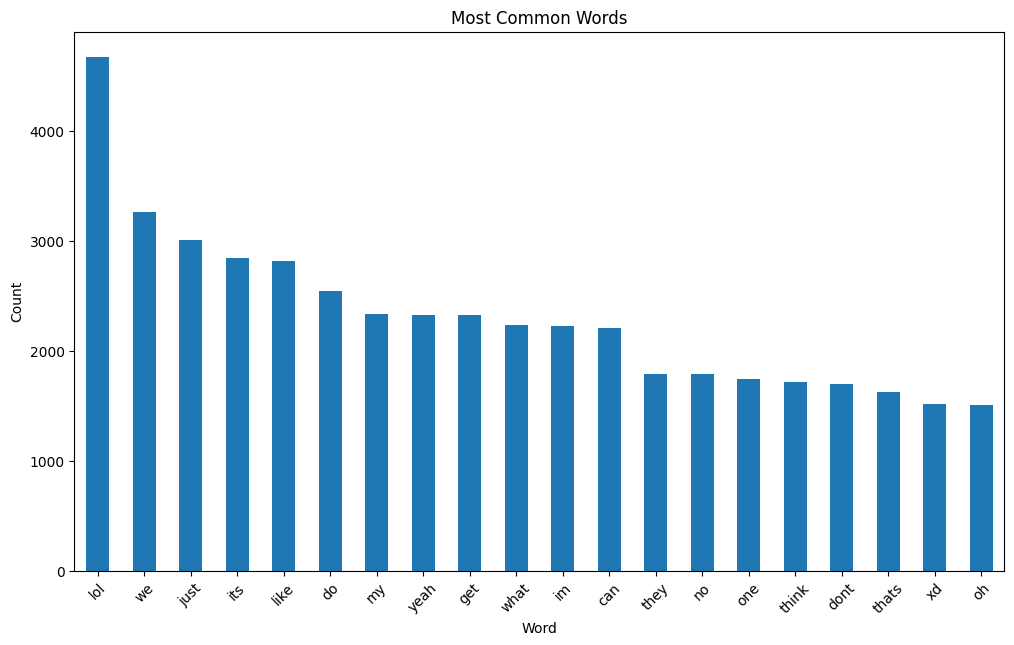

    Word  Count
0    lol   4669
1     we   3260
2   just   3011
3    its   2842
4   like   2814
..   ...    ...
95  play    555
96   use    543
97  does    542
98  over    521
99  here    519

[100 rows x 2 columns]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

# Sample stop words, you can extend this list or use libraries like nltk for a comprehensive list
stop_words = set([
    'and', 'the', 'to', 'of', 'in', 'is', 'you', 'that', 'it', 'for', 'on', 'with', 'as', 'this', 'was', 'are', 'or', 'not', 'be', 'have', 'by', 'at', 'from', 'an', 'if', 'has', 'but', 'so', 'there', 'i', 'a'
])

text_df = df[df['type'] == 'text']

# Pre-process the data
words = []
for message in text_df['content']:
    # Convert to lowercase and remove punctuation
    cleaned_message = message.lower().translate(str.maketrans('', '', string.punctuation))
    words.extend(word for word in cleaned_message.split() if word not in stop_words)

# Count the words
word_counts = Counter(words)

# Get the most common words
common_words = word_counts.most_common(200)

# Convert to DataFrame for easier plotting
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
word_df[:20].set_index('Word').plot(kind='bar', legend=False, ax=plt.gca()) # change the indexing ([:20]) to change the number of words
plt.title('Most Common Words')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

print(word_df.head(100))

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


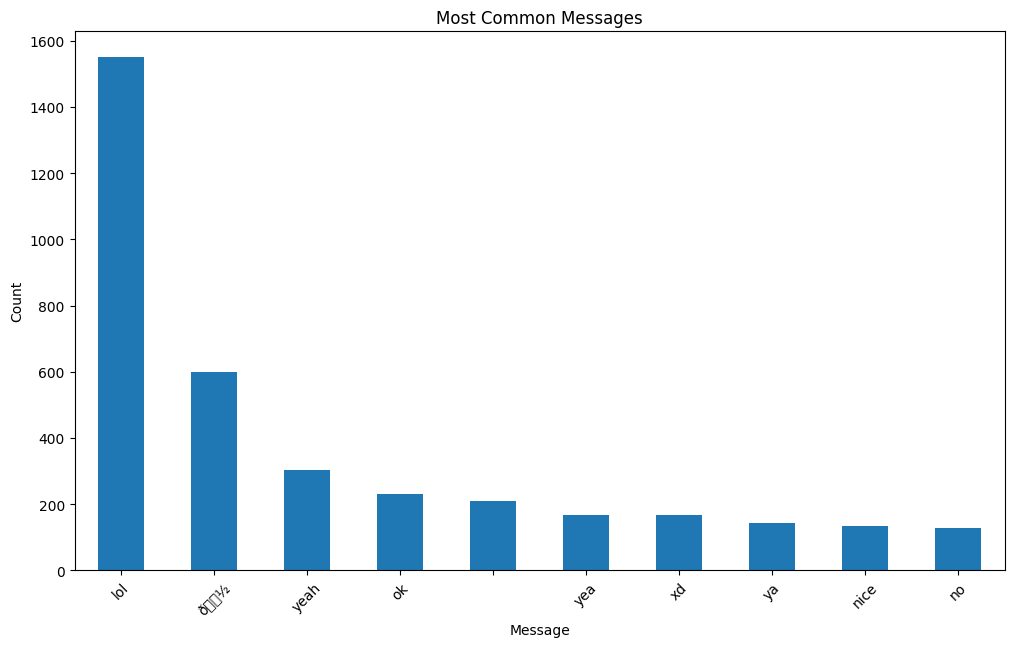

  Message  Count
0     lol   1551
1    ð½    601
2    yeah    302
3      ok    231
4            211
5     yea    167
6      xd    167
7      ya    144
8    nice    135
9      no    128


In [13]:
text_df = df[df['type'] == 'text']

# Pre-process the data
messages = []
long_messages = []
for message in text_df['content']:
    # Convert to lowercase and remove punctuation
    cleaned_message = message.lower().translate(str.maketrans('', '', string.punctuation)).strip()
    messages.append(cleaned_message)
    if message.count(' ') > 3:
        long_messages.append(cleaned_message)

# Count the messages
message_counts = Counter(messages)

# Get the most common messages
common_messages = message_counts.most_common(200)

# Convert to DataFrame for easier plotting
message_df = pd.DataFrame(common_messages, columns=['Message', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
message_df[:10].set_index('Message').plot(kind='bar', legend=False, ax=plt.gca())
plt.title('Most Common Messages')
plt.ylabel('Count')
plt.xlabel('Message')
plt.xticks(rotation=45)
plt.show()

print(message_df.head(10))

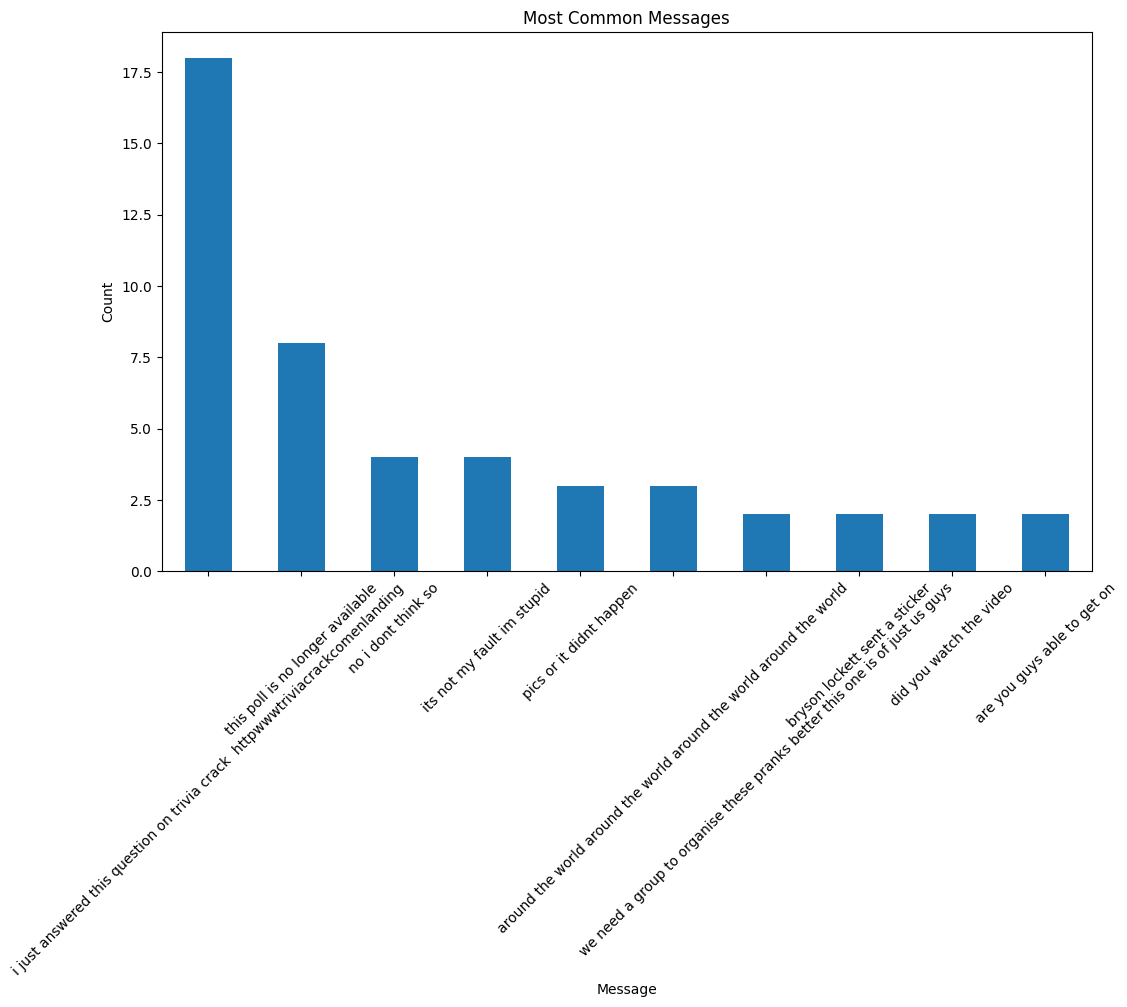

                                             Message  Count
0  i just answered this question on trivia crack ...     18
1                   this poll is no longer available      8
2                                 no i dont think so      4
3                         its not my fault im stupid      4
4                            pics or it didnt happen      3
5  around the world around the world around the w...      3
6  we need a group to organise these pranks bette...      2
7                      bryson lockett sent a sticker      2
8                            did you watch the video      2
9                        are you guys able to get on      2


In [14]:
text_df = df[df['type'] == 'text']

# Filters to remove common system messages
filter_photo = text_df['content'].str.contains("changed the group photo", na=False, case=False)
filter_reacted = text_df['content'].str.contains("reacted .* to your message", na=False, case=False, regex=True)

# Combine the filters using the `|` operator (logical OR)
combined_filter = filter_photo | filter_reacted

# Remove rows with system messages
text_df = text_df[~combined_filter]

# Pre-process the data
long_messages = []
for message in text_df['content']:
    # Convert to lowercase and remove punctuation
    cleaned_message = message.lower().translate(str.maketrans('', '', string.punctuation)).strip()
    if message.count(' ') > 3:
        long_messages.append(cleaned_message)

# Count the long messages
long_message_counts = Counter(long_messages)

# Get the most common messages
common_messages = long_message_counts.most_common(200)

# Convert to DataFrame for easier plotting
message_df = pd.DataFrame(common_messages, columns=['Message', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
message_df[:10].set_index('Message').plot(kind='bar', legend=False, ax=plt.gca())
plt.title('Most Common Messages')
plt.ylabel('Count')
plt.xlabel('Message')
plt.xticks(rotation=45)
plt.show()

print(message_df.head(10))

In [35]:
# Extract date from timestamp and count messages per day
messages_per_day = df.groupby('date').size()

# First and last days:
first_day = min(df['date'])
last_day = max(df['date'])

# Total Messages
total_messages = len(df)

# Active Days
active_days = messages_per_day.count()

# Duration
duration = (df['timestamp'].max() - df['timestamp'].min()).days + 1  # +1 to include both start and end day

# Most Messages in a Day
most_messages_in_a_day = messages_per_day.max()

# Average Messages per Day
avg_messages_per_day = total_messages / duration

# Messages per Active Day
avg_messages_per_active_day = total_messages / active_days

# Most and Least Active Senders
sender_counts = df['sender'].value_counts()
most_active_sender = sender_counts.idxmax()
least_active_sender = sender_counts.idxmin()

# Display
print(f"Total Messages: {total_messages}")
print(f"First Message Sent: {first_day}")
print(f"Last Message Sent: {last_day}")
print(f"Days Between First and Last Message: {duration}")
print(f"Days with at Least One Message: {active_days}")
print(f"Most Messages in a Day: {most_messages_in_a_day}")
print(f"Average Messages per Day: {avg_messages_per_day:.2f}")
print(f"Average Messages per Active Day: {avg_messages_per_active_day:.2f}")
print(f"Most Active Sender: {most_active_sender} with {sender_counts.max()} messages")
print(f"Least Active Sender: {least_active_sender} with {sender_counts.min()} messages")

# Day with Most Messages
day_with_most_messages = messages_per_day.idxmax()

# Filter messages from that day
messages_on_max_day = df[df['date'] == day_with_most_messages]

# Displaying a few messages from that day
sample_messages = messages_on_max_day.head(5)  # Change this number if you want more/less messages (can also use df.sample(n) but that's dangerous since this output will show up on github and you never know what it will pull)

print(f"\n\nDay with Most Messages: {day_with_most_messages.strftime('%Y-%m-%d')}")
print("Sample Messages:")
for idx, row in sample_messages.iterrows():
    print(f"{row['timestamp'].strftime('%Y-%m-%d %H:%M:%S')} - {row['sender']}: {row['content']}")


Total Messages: 57856
First Message Sent: 2013-04-27
Last Message Sent: 2023-06-09
Days Between First and Last Message: 3696
Days with at Least One Message: 2135
Most Messages in a Day: 830
Average Messages per Day: 15.65
Average Messages per Active Day: 27.10
Most Active Sender: PF with 16125 messages
Least Active Sender: DT with 6793 messages


Day with Most Messages: 2013-12-01
Sample Messages:
2013-12-01 00:48:58 - PF: Nearing 90 hours 
2013-12-01 00:50:47 - BL: On pkmn? 
2013-12-01 00:51:37 - PF: Yup 
2013-12-01 00:51:48 - BL: I've got 65
2013-12-01 00:52:21 - TL: I have 110 or something


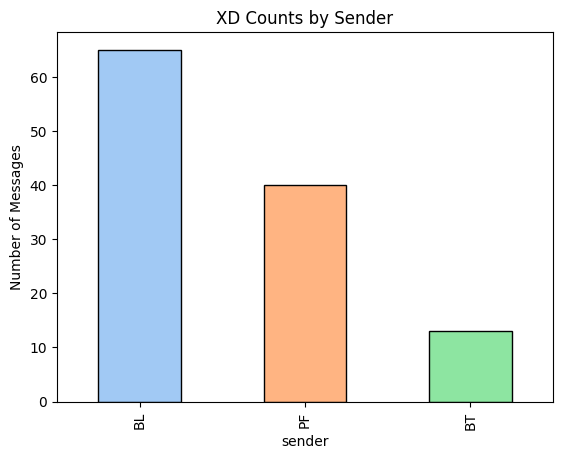

In [16]:
xd_df = df[(df['type'] == 'text') & ((df['content'] == 'xd') | (df['content'] == 'XD') | (df['content'] == 'xD') | (df['content'] == 'XD'))]

message_counts = xd_df['sender'].value_counts()
message_counts.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
plt.title("XD Counts by Sender")
plt.ylabel("Number of Messages")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


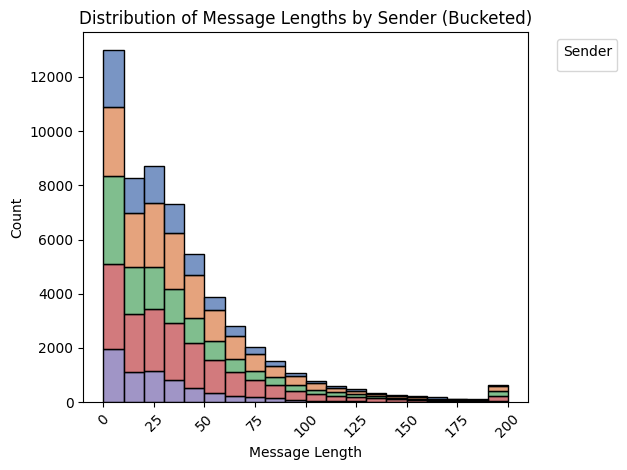

In [17]:
# Set a threshold
x = 200

# Bucket messages with length greater than x
df['message_length_bucketed'] = df['message_length'].apply(lambda y: x if y > x else y)

# Now, plot the histogram using the 'message_length_bucketed' column
sns.histplot(data=df, x="message_length_bucketed", hue="sender", multiple="stack", binwidth=10, palette="deep")

plt.title('Distribution of Message Lengths by Sender (Bucketed)')
plt.ylabel('Count')
plt.xlabel('Message Length')
plt.xticks(rotation=45)
plt.legend(title='Sender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


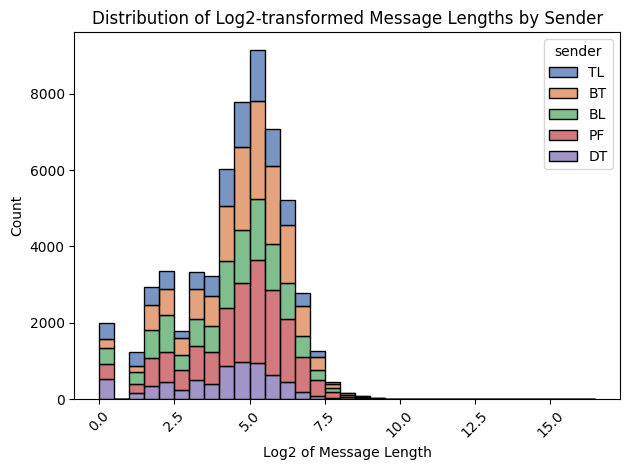

In [18]:
# Plotting the histogram of log-transformed message lengths
plot = sns.histplot(data=df, x="log_message_length", hue="sender", multiple="stack", binwidth=0.5, palette="deep")

plt.title('Distribution of Log2-transformed Message Lengths by Sender')
plt.ylabel('Count')
plt.xlabel('Log2 of Message Length')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

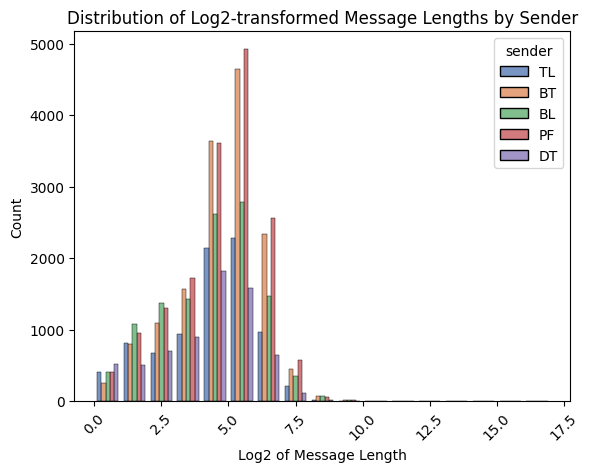

In [19]:
# Plotting the histogram of log-transformed message lengths
plot = sns.histplot(data=df, x="log_message_length", hue="sender", multiple="dodge", binwidth=1, palette="deep", shrink=0.8)

plt.title('Distribution of Log2-transformed Message Lengths by Sender')
plt.ylabel('Count')
plt.xlabel('Log2 of Message Length')
plt.xticks(rotation=45)

plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


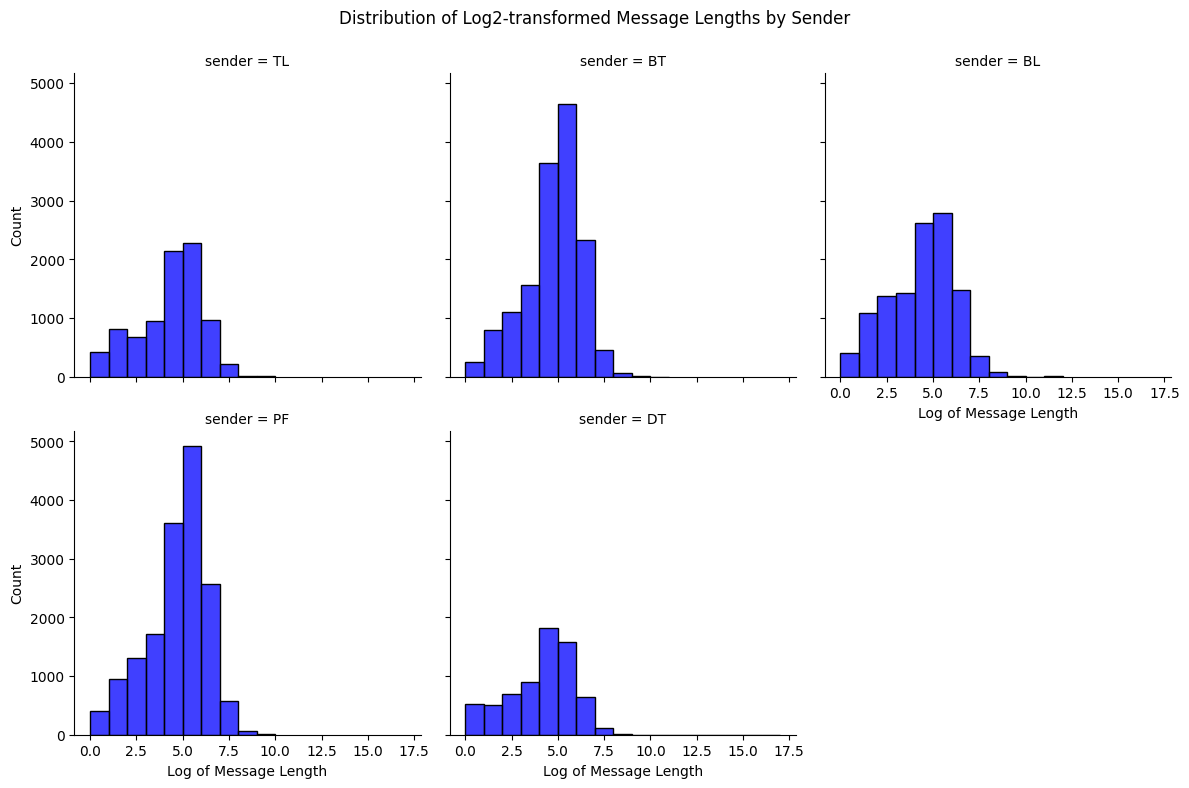

In [20]:
# Setting up a grid of plots, one for each sender
g = sns.FacetGrid(df, col="sender", col_wrap=3, sharex=True, sharey=True, height=4)

# Mapping a histogram to each sender's subplot
g.map(sns.histplot, "log_message_length", binwidth=1, color='blue', kde=False)

# Adding title and axis labels
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in the grid
g.fig.suptitle('Distribution of Log2-transformed Message Lengths by Sender')
g.set_axis_labels('Log of Message Length', 'Count')

plt.show()